# SME0828 - Introdução à Ciência de Dados (2020)


### Projeto Final
### Universidade de São Paulo, São Carlos, Brasil.
#### Professor:
Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
#### Alunos:
Luiz Gustavo Ribeiro - 5967710 <br>
Pedro Stefanelli - 

### Exercicio 3

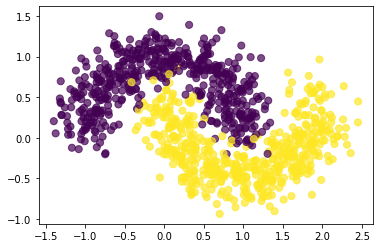

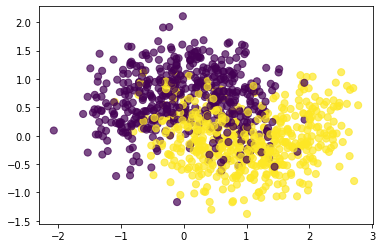

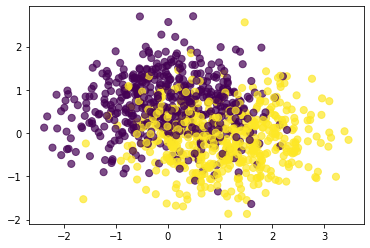

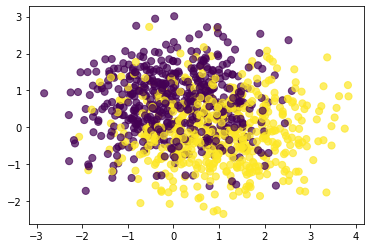

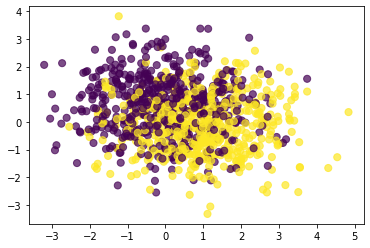

score_NBayes:          [0.885, 0.83, 0.795, 0.765, 0.675] 
score_BParametrico:    [0.89, 0.835, 0.795, 0.765, 0.67] 
score_BNaoParametrico: [0.885, 0.83, 0.79, 0.755, 0.675]


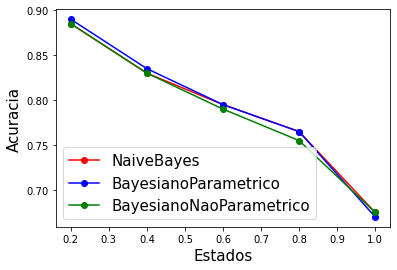

In [370]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity

from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

random.seed(42)
n_samples = 1000
n = [0.2, 0.4, 0.6, 0.8, 1]


def CreatePontos(n, n_samples):  
    data = datasets.make_moons(n_samples = n_samples, noise = n)
    X = data[0]
    y = data[1]
    classes = np.unique(y)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.show(True)
    return X, y, classes
    
def transformer(X,y):
    # Transforma os dados para terem media igual a zero e variancia igual a 1
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Seleciona os conjuntos de treinamento e teste
    p = 0.8 # fraction of elements in the test set
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)
    
    return X_train, X_test, y_train, y_test


def NBayes(X_train, X_test, y_train, y_test):
    # ajusta o classificador Naive-Bayes de acordo com os dados
    model = GaussianNB()
    model.fit(X_train, y_train)
    # realiza a predicao
    y_pred = model.predict(X_test)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score

def BayesianoParametrico(X_train, X_test, y_train, y_test, classes):

    ####  Realiza a classificacao ####
    # Matriz que armazena as probabilidades para cada classe
    P = pd.DataFrame(data=np.zeros((X_train.shape[0], len(classes))), columns = classes) 

    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor media
        cv = np.cov(np.transpose(Z)) # Matriz de covariancia
        for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
            x = X_test[j,:]
            # calcula a probabilidade pertencer a cada classe
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)

    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score

def BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h):
#     print(len(X_train), len(X_test), len(y_train), len(y_test), len(classes), h)
    for i in np.arange(0, len(classes)): # Para cada classe
        element = tuple(np.where(y_train == classes[i])) # elementos na classe i
        Pc[i] = len(element)/len(y_train) # Probabilidade pertencer a classe i
        Z = X_train[element,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
            x = X_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score



score_NBayes = []
score_BParametrico = []
score_BNaoParametrico = []
h = 2

for i in n:
    X, y, classes = CreatePontos(i, n_samples)
    X_train, X_test, y_train, y_test = transformer(X , y)
    score_NBayes.append(NBayes(X_train, X_test, y_train, y_test))
    score_BParametrico.append(BayesianoParametrico(X_train, X_test, y_train, y_test, classes))
    score_BNaoParametrico.append(BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h))
print("score_NBayes:         ",score_NBayes, "\nscore_BParametrico:   " ,score_BParametrico , "\nscore_BNaoParametrico:" ,score_BNaoParametrico)



# NaiveBayes
plt.plot(n, score_NBayes, 'ro-', label = 'NaiveBayes')
plt.xlabel('Estados', fontsize = 15)
plt.ylabel('Acuracia',fontsize = 15)

# BayesianoParametrico
plt.plot(n, score_BParametrico, 'bo-',label='BayesianoParametrico')

# BayesianoParametrico
plt.plot(n, score_BNaoParametrico, 'go-',label='BayesianoNaoParametrico')

plt.legend(fontsize = 15)
plt.show(True)    
    



### Exercicio 4

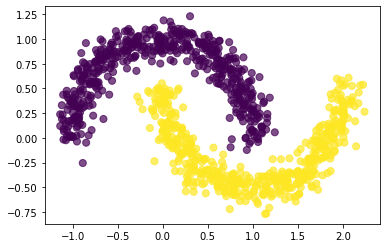

In [371]:
X, y, classes = CreatePontos(0.1, n_samples)
X_train, X_test, y_train, y_test = transformer(X , y)

Regiões de separação Naive Bayes

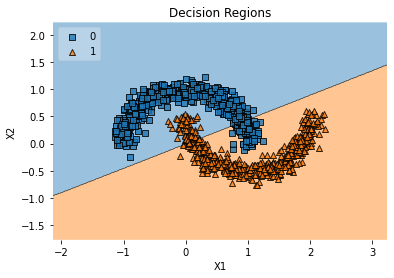

In [372]:
# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)

plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions Naive Bayes')
plt.show()

Regiões de separação Knn Vizinhos

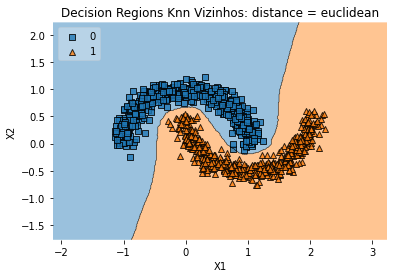

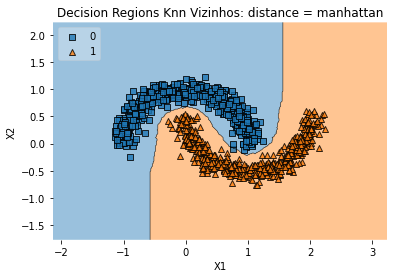

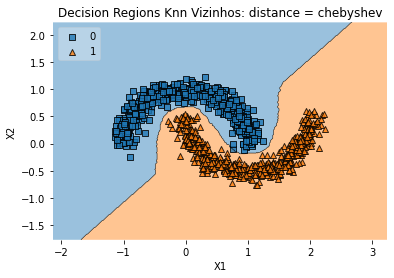

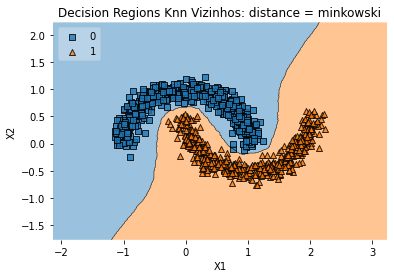

In [377]:
# mostra as regiões de separação para diversos valores de k
vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 21
for d in vm:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions Knn Vizinhos: distance = '+ d)
    plt.show()

Regiões de separação Regressão Logística

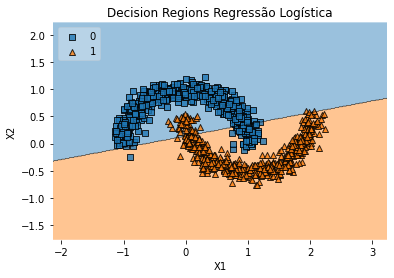

In [375]:
# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Decision Regions Regressão Logística')
#plt.savefig('logistic-region.eps')
plt.show()

### Exercicio 5


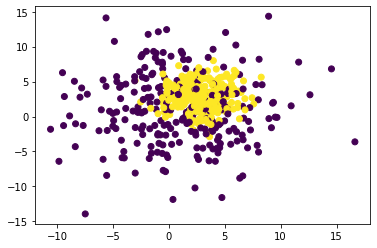

In [220]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

random.seed(42) 

n = 500
c = [(1,1), (3,3)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class

X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
classes = np.unique(y)

In [221]:
# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)


Acuracia: 0.85


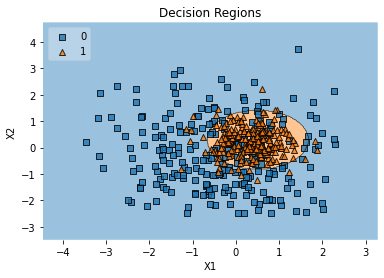

In [195]:

# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)
# realiza a predicao
y_pred = model.predict(X_test)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)


# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

In [222]:

####  Realiza a classificacao ####
# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_train.shape[0], len(classes))), columns = classes) 


Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
    m = np.mean(Z, axis = 0) # Vetor media
    cv = np.cov(np.transpose(Z)) # Matriz de covariancia
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        # calcula a probabilidade pertencer a cada classe
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)

# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)

Acuracia: 0.85


score_NBayes: [0.85, 0.9, 0.93, 0.99, 0.99, 1.0, 1.0] score_BParametrico: [0.84, 0.89, 0.94, 0.99, 0.99, 1.0, 1.0]


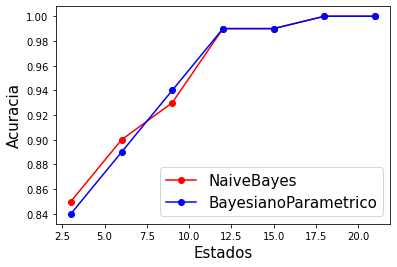

In [335]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


random.seed(42) 

n = 500
c = [[(1,1), (3,3)], [(1,1), (6,6)], [(1,1), (9,9)], [(1,1), (12,12)], [(1,1), (15,15)], [(1,1), (18,18)], [(1,1), (21,21)]] #center of the points
std = [5.0, 2] # standard deviation

def CreatePontos (n, c, std):
    X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std, centers= c)

    # monta a matrix de atributos
    d = np.column_stack((X,np.transpose(y)))
    # converte para o formato dataframe do Pandas
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
    features_names = ['X1', 'X2']
    classes = np.unique(y)
    return X, y, classes
    
def transformer(X,y):
    # Transforma os dados para terem media igual a zero e variancia igual a 1
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Seleciona os conjuntos de treinamento e teste
    p = 0.8 # fraction of elements in the test set
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)
    
    return X_train, X_test, y_train, y_test


def NBayes(X_train, X_test, y_train, y_test):
    # ajusta o classificador Naive-Bayes de acordo com os dados
    model = GaussianNB()
    model.fit(X_train, y_train)
    # realiza a predicao
    y_pred = model.predict(X_test)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score

def BayesianoParametrico(X_train, X_test, y_train, y_test, classes):

    ####  Realiza a classificacao ####
    # Matriz que armazena as probabilidades para cada classe
    P = pd.DataFrame(data=np.zeros((X_train.shape[0], len(classes))), columns = classes) 

    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        Z = X_train[elements,:][0] # Elementos no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor media
        cv = np.cov(np.transpose(Z)) # Matriz de covariancia
        for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
            x = X_test[j,:]
            # calcula a probabilidade pertencer a cada classe
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)

    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score

score_NBayes = []
score_BParametrico = []

for i in c:
    X, y, classes = CreatePontos (n, i, std)
    X_train, X_test, y_train, y_test = transformer(X , y)
    score_NBayes.append(NBayes(X_train, X_test, y_train, y_test))
    score_BParametrico.append(BayesianoParametrico(X_train, X_test, y_train, y_test, classes))
print("score_NBayes:",score_NBayes, "score_BParametrico:" ,score_BParametrico)

estado=[3,6,9,12,15,18,21]

# NaiveBayes
plt.plot(estado, score_NBayes, 'ro-', label = 'NaiveBayes')
plt.xlabel('Estados', fontsize = 15)
plt.ylabel('Acuracia',fontsize = 15)

# BayesianoParametrico
plt.plot(estado, score_BParametrico, 'bo-',label='BayesianoParametrico')
plt.legend(fontsize = 15)
plt.show(True)    
    


### Exercicio 6 

NBayes

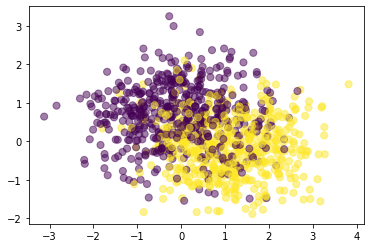

classes [0 1]

Acuracia: 0.795


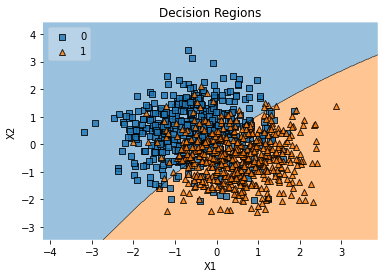

In [390]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.7)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.5)
plt.show(True)

classes = np.unique(y)
print("classes",classes)

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)


# ajusta o classificador Naive-Bayes de acordo com os dados
model = GaussianNB()
model.fit(X_train, y_train)
# realiza a predicao
y_pred = model.predict(X_test)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('\nAcuracia:', score)


# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

K-NN

In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan' , 'chebyshev', 'minkowski']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [392]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [389]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.913
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=11)


In [393]:
model = KNeighborsClassifier(n_neighbors=29, weights = 'uniform', metric = 'chebyshev')
model.fit(X_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(X_test) 
# verifica a acurácia da predicao
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)


Accuracy: 0.79


Logistic Regression

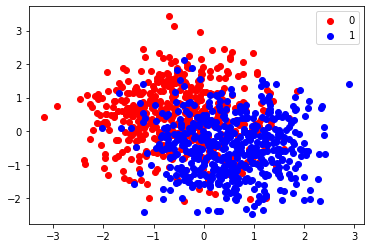

Acurácia:  0.79


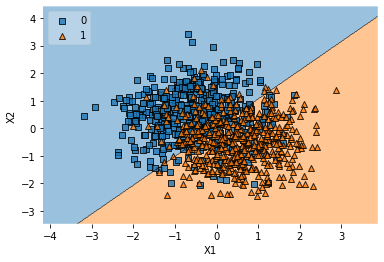

In [394]:
from sklearn.linear_model import LogisticRegression
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)


model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Acurácia: ', model.score(X_test, y_test))


# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

### Exercício 7

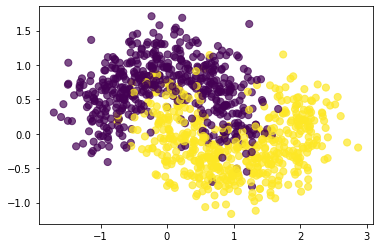

classes [0 1]


In [397]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.3)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

classes = np.unique(y)
print("classes",classes)

Árvore de Decisão 

In [396]:
from sklearn.model_selection import GridSearchCV

# we create a list
weight_options = ['uniform', 'distance']

metric_options = ['euclidean', 'manhattan' , 'chebyshev', 'minkowski']

# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(param_grid)

Floresta Aleatórias

In [ ]:
# we create a list
weight_options = ['uniform', 'distance']

metric_options = ['euclidean', 'manhattan' , 'chebyshev', 'minkowski']

# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(param_grid)

Bagging

In [ ]:
vscore = []
vn = []
# varia o número de estimadores na amostra (número de classificações a serem feitas)
for n in range(1,100,10):
    model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'),
                              n_estimators=n, random_state = 101)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('sampe size:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('*** Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)],'***')
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()